In [31]:
import pandas as pd
import matplotlib.pyplot as mp
import os
from datetime import datetime
import time
from dateutil import parser

In [3]:
files = os.listdir('/Users/Lucas/Downloads/Data/Stocks/')

In [320]:
master_df = pd.DataFrame()
for file in files[0:200]:
    if(file.endswith('.csv')):
        try:
#             print (file)
            df = pd.read_csv('/Users/Lucas/Downloads/Data/Stocks/'+file)
            df['Symbol'] = [file]*len(df)
            master_df = pd.concat([master_df, df], axis=0)
        except:           
            continue
            

In [95]:
df = master_df

In [321]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.0
mean,44.012608,44.790213,43.210357,44.043488,2474.195828,0.0
std,17.450622,17.715173,17.160118,17.485698,4497.849260,0.0
min,17.000000,17.900000,15.260000,16.810000,100.000000,0.0
25%,26.940000,27.290000,26.420000,26.900000,500.000000,0.0
50%,46.000000,47.040000,45.010000,46.200000,1186.000000,0.0
75%,56.850000,57.500000,56.000000,56.840000,2557.000000,0.0
max,86.000000,86.750000,85.250000,86.000000,79016.000000,0.0


In [16]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,13.660,14.043,13.553,13.991,307538,0
1,2005-02-28,13.835,13.998,13.605,13.998,311838,0
2,2005-03-01,13.966,14.043,13.782,13.882,235085,0
3,2005-03-02,13.737,13.966,13.660,13.805,151032,0
4,2005-03-03,13.813,13.899,13.637,13.774,217362,0


In [97]:
df = df.sort_values('Date')

In [98]:
timestamps = []
count = 0
for i, row in df.iterrows():
    date = parser.parse(row['Date'])
    temp = time.mktime(date.timetuple())
    timestamps.append(temp)
    count = count + 1
    if(count%10000 == 0):
        print(count/386968)

0.025841930082073968
0.051683860164147936
0.07752579024622192
0.10336772032829587
0.12920965041036986
0.15505158049244383
0.1808935105745178
0.20673544065659175
0.23257737073866572
0.2584193008207397
0.2842612309028137
0.31010316098488766
0.33594509106696163
0.3617870211490356
0.3876289512311096
0.4134708813131835
0.43931281139525746
0.46515474147733143
0.4909966715594054
0.5168386016414794
0.5426805317235533
0.5685224618056274
0.5943643918877013
0.6202063219697753
0.6460482520518492
0.6718901821339233
0.6977321122159972
0.7235740422980712
0.7494159723801451
0.7752579024622192
0.8010998325442931
0.826941762626367
0.852783692708441
0.8786256227905149
0.904467552872589
0.9303094829546629
0.9561514130367369
0.9819933431188108


In [101]:
df['Timestamp'] = timestamps

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12026bcc0>]],
      dtype=object)

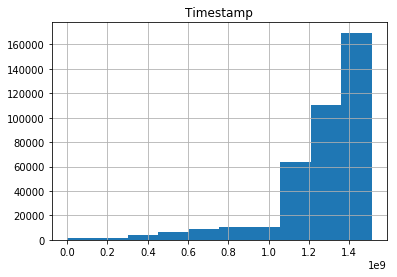

In [50]:
df.hist('Timestamp')

In [41]:
delta = []
for i, row in df.iterrows():
    _open = row['Open']
    close = row['Close']
    delta.append(close - _open)
    
df['Daily Change'] = delta

positive = []
for i, row in df.iterrows():
    change = row['Daily Change']
    if(change > 0):
        positive.append('1')
    elif(change < 0):
        positive.append('-1')
    else:
        positive.append('0')
        
df['Positive'] = positive

In [65]:
delta = []
for i, row in df.iterrows():
    change = row['Daily Change']
    close = row['Close']
    delta.append((change/close)*100)
    
df['Daily Change Percentage'] = delta

In [67]:
df['color'] = 'g'
df.loc[df['Positive'] == '-1', 'color'] = 'r'

In [ ]:
df.describe()

(-50, 50)

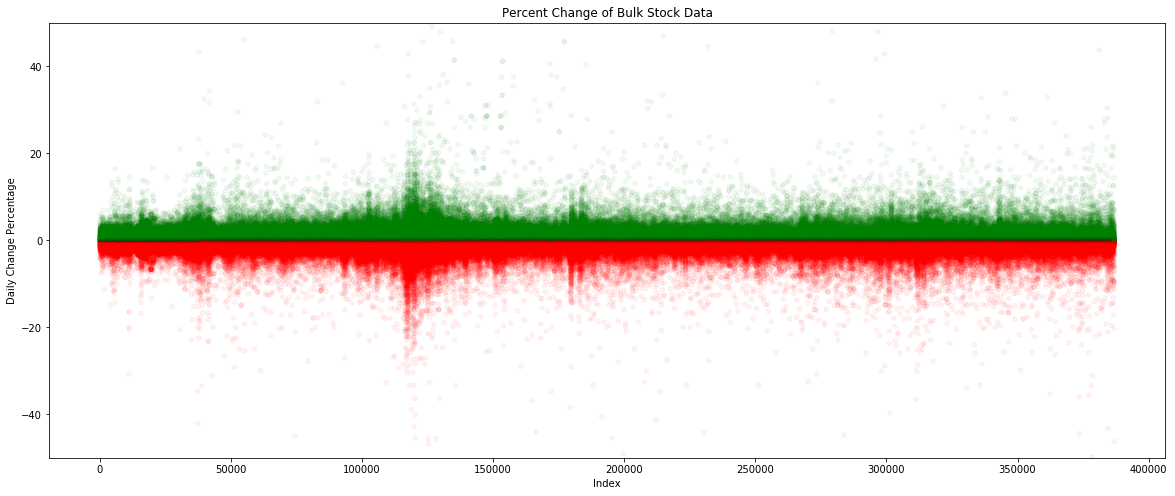

In [68]:
df['Time'] = pd.to_datetime(df['Date'])
df['Index'] = list(range(0,len(df)))
df.plot(color=df['color'],
            kind='scatter',
            x='Index',
            y='Daily Change Percentage',
            alpha=0.05, 
            figsize=(20,8),
            title='Percent Change of Bulk Stock Data')
mp.ylim(-50,50)

# Machine Learning Starts Here

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [322]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=0.33, random_state=55)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120b1cac8>]],
      dtype=object)

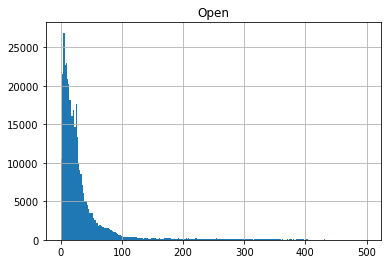

In [104]:
training_data.hist('Open', bins = list(range(0,500,2)))

In [82]:
training_data.describe()

,Open,High,Low,Close,Volume,Timestamp
count,386968.000000,386968.000000,386968.000000,386968.000000,3.869680e+05,3.869680e+05
mean,37.269837,37.752836,36.770659,37.272442,1.512746e+06,1.268622e+09
std,70.087205,70.958961,69.193916,70.086944,4.730975e+06,2.411859e+08
min,0.120100,0.120100,0.112100,0.120100,0.000000e+00,1.044000e+05
25%,9.361475,9.500000,9.220000,9.369100,3.360375e+04,1.191816e+09
50%,19.723000,20.000000,19.417000,19.723000,2.129330e+05,1.330060e+09
75%,35.176250,35.620000,34.713150,35.165250,1.191272e+06,1.433822e+09
max,1068.750000,1106.240000,1047.050000,1068.750000,4.098206e+08,1.510290e+09


In [325]:
bin_size = 2
bins = list(range(0,50,offset))

,Open,High,Low,Close,Volume,Timestamp,open_bin,close_bin,high_bin,low_bins,stock index
count,386968.000000,386968.000000,386968.000000,386968.000000,3.869680e+05,3.869680e+05,386968.000000,386968.000000,386968.000000,386968.000000,386968.000000
mean,37.269837,37.752836,36.770659,37.272442,1.512746e+06,1.268622e+09,6.975063,6.972827,7.006703,6.944809,97.283005
std,70.087205,70.958961,69.193916,70.086944,4.730975e+06,2.411859e+08,6.526513,6.524921,6.554826,6.499112,57.830896
min,0.120100,0.120100,0.112100,0.120100,0.000000e+00,1.044000e+05,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,9.361475,9.500000,9.220000,9.369100,3.360375e+04,1.191816e+09,2.000000,2.000000,2.000000,2.000000,47.000000
50%,19.723000,20.000000,19.417000,19.723000,2.129330e+05,1.330060e+09,6.000000,6.000000,6.000000,6.000000,94.000000
75%,35.176250,35.620000,34.713150,35.165250,1.191272e+06,1.433822e+09,12.000000,12.000000,12.000000,11.000000,146.000000
max,1068.750000,1106.240000,1047.050000,1068.750000,4.098206e+08,1.510290e+09,24.000000,24.000000,24.000000,24.000000,198.000000


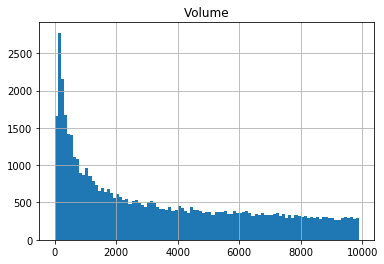

In [288]:
training_data.hist('Volume', bins = list(range(0,10000,100)))
vol_bin = list(range(0,5))

#[0-1000][1000-10000][10000-100000][100000-1000000][1000000-infinity]
training_data.describe()

In [291]:
vol_bin = []

for i, row in training_data.iterrows():
    v = row['Volume']
    
    flag = 0
    
    if(v >= pow(10,6)):
        vol_bin.append(5)
        continue
    
    for j, _bin in enumerate(bins):
        if(v < pow(10,j+3)):
            flag = flag+1
            vol_bin.append(j)
            break

        
    if(flag != 1):
        print(item, "you failed...", flag)

In [203]:
open_bins = []
high_bins = []
close_bins = []
low_bins = []

for i, row in training_data.iterrows():
    o = row['Open']
    hi = row['High']
    cl = row['Close']
    lo = row['Low']
    
    group = [o,hi,cl,lo]
    bin_group = [open_bins, high_bins, close_bins, low_bins]
    
    for k, item in enumerate(group):
        flag = 0
        for j, _bin in enumerate(bins):
            if (item < _bin + bin_size):
                flag = flag + 1
                item = j
                bin_group[k].append(item)
                break
            elif(item >= 50):
                flag = flag + 1
                item = -1
                bin_group[k].append(item)
                break
        
        if(flag != 1):
            print(item, "you failed...", flag)
        
    

In [294]:
print(len(open_bins),len(close_bins),len(high_bins),len(low_bins),len(vol_bin))

386968 386968 386968 386968 386968


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12974de48>]],
      dtype=object)

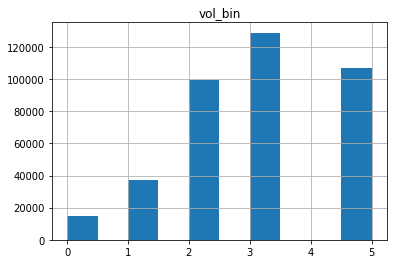

In [298]:
training_data.hist("vol_bin")

In [326]:
training_data['open_bin'] = open_bins
training_data['close_bin'] = close_bins
training_data['high_bin'] = high_bins
training_data['low_bins'] = low_bins
training_data['vol_bin'] = vol_bin
training_data.head()

,Date,Open,High,Low,Close,Volume,Timestamp,Symbol,open_bin,close_bin,high_bin,low_bins,stock index,vol_bin
0,1970-01-02,167.25,173.91,167.25,173.91,9300,104400.0,nav.us.csv,-1,-1,-1,-1,107,1
1,1970-01-05,174.74,184.72,174.74,182.23,17700,363600.0,nav.us.csv,-1,-1,-1,-1,107,2
2,1970-01-06,182.23,184.72,179.73,183.06,12300,450000.0,nav.us.csv,-1,-1,-1,-1,107,2
3,1970-01-07,183.06,183.89,180.56,180.56,7900,536400.0,nav.us.csv,-1,-1,-1,-1,107,1
4,1970-01-08,180.56,182.23,179.73,180.56,7800,622800.0,nav.us.csv,-1,-1,-1,-1,107,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b166d68>]],
      dtype=object)

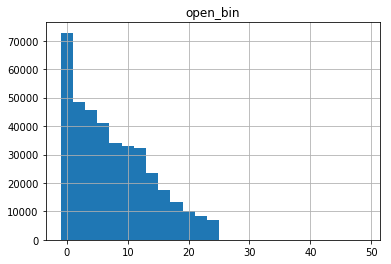

In [208]:
training_data.hist('open_bin', bins = list(range(-1,50,bin_size)))

In [169]:
stock_names = set(training_data['Symbol'])
stock_index = []

for i, row in training_data.iterrows():
    stockname = row['Symbol']
    for idx, thing in enumerate(list(stock_names)):
        if (stockname == thing):
            stock_index.append(idx)

In [327]:
training_data['stock index'] = stock_index
training_data.head()

,Date,Open,High,Low,Close,Volume,Timestamp,Symbol,open_bin,close_bin,high_bin,low_bins,stock index,vol_bin
0,1970-01-02,167.25,173.91,167.25,173.91,9300,104400.0,nav.us.csv,-1,-1,-1,-1,107,1
1,1970-01-05,174.74,184.72,174.74,182.23,17700,363600.0,nav.us.csv,-1,-1,-1,-1,107,2
2,1970-01-06,182.23,184.72,179.73,183.06,12300,450000.0,nav.us.csv,-1,-1,-1,-1,107,2
3,1970-01-07,183.06,183.89,180.56,180.56,7900,536400.0,nav.us.csv,-1,-1,-1,-1,107,1
4,1970-01-08,180.56,182.23,179.73,180.56,7800,622800.0,nav.us.csv,-1,-1,-1,-1,107,1


In [329]:
feats_labels = training_data[['open_bin', 'close_bin', 'high_bin', 'low_bins', 'stock index','vol_bin']]
feats_labels = feats_labels[~feats_labels['open_bin'].isin([-1])]

In [330]:
features = feats_labels[['close_bin', 'vol_bin', 'high_bin', 'low_bins', 'stock index']]
labels = feats_labels[['open_bin']]

X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=0.40, random_state=75)

In [331]:
clf =  RandomForestClassifier(n_estimators=10)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [332]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [333]:
y_pred = clf.predict(X_test)

In [334]:
cf_report = classification_report(y_true = y_test, y_pred=y_pred)
print (cf_report)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      4214
          1       0.97      0.97      0.97      8518
          2       0.96      0.96      0.96     10741
          3       0.95      0.93      0.94      9062
          4       0.93      0.94      0.93      9099
          5       0.92      0.91      0.91      8450
          6       0.90      0.92      0.91      8107
          7       0.90      0.89      0.90      7166
          8       0.89      0.87      0.88      6406
          9       0.87      0.86      0.87      6418
         10       0.86      0.89      0.87      6630
         11       0.86      0.85      0.85      5939
         12       0.88      0.87      0.88      7099
         13       0.85      0.85      0.85      5492
         14       0.80      0.83      0.81      4024
         15       0.82      0.77      0.79      3607
         16       0.79      0.83      0.81      3408
         17       0.80      0.78      0.79   

In [336]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)

In [338]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(
    criterion='gini', max_depth=5,
    max_features=None, max_leaf_nodes=10,
    min_impurity_split=1e-07, min_samples_leaf=10)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [339]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

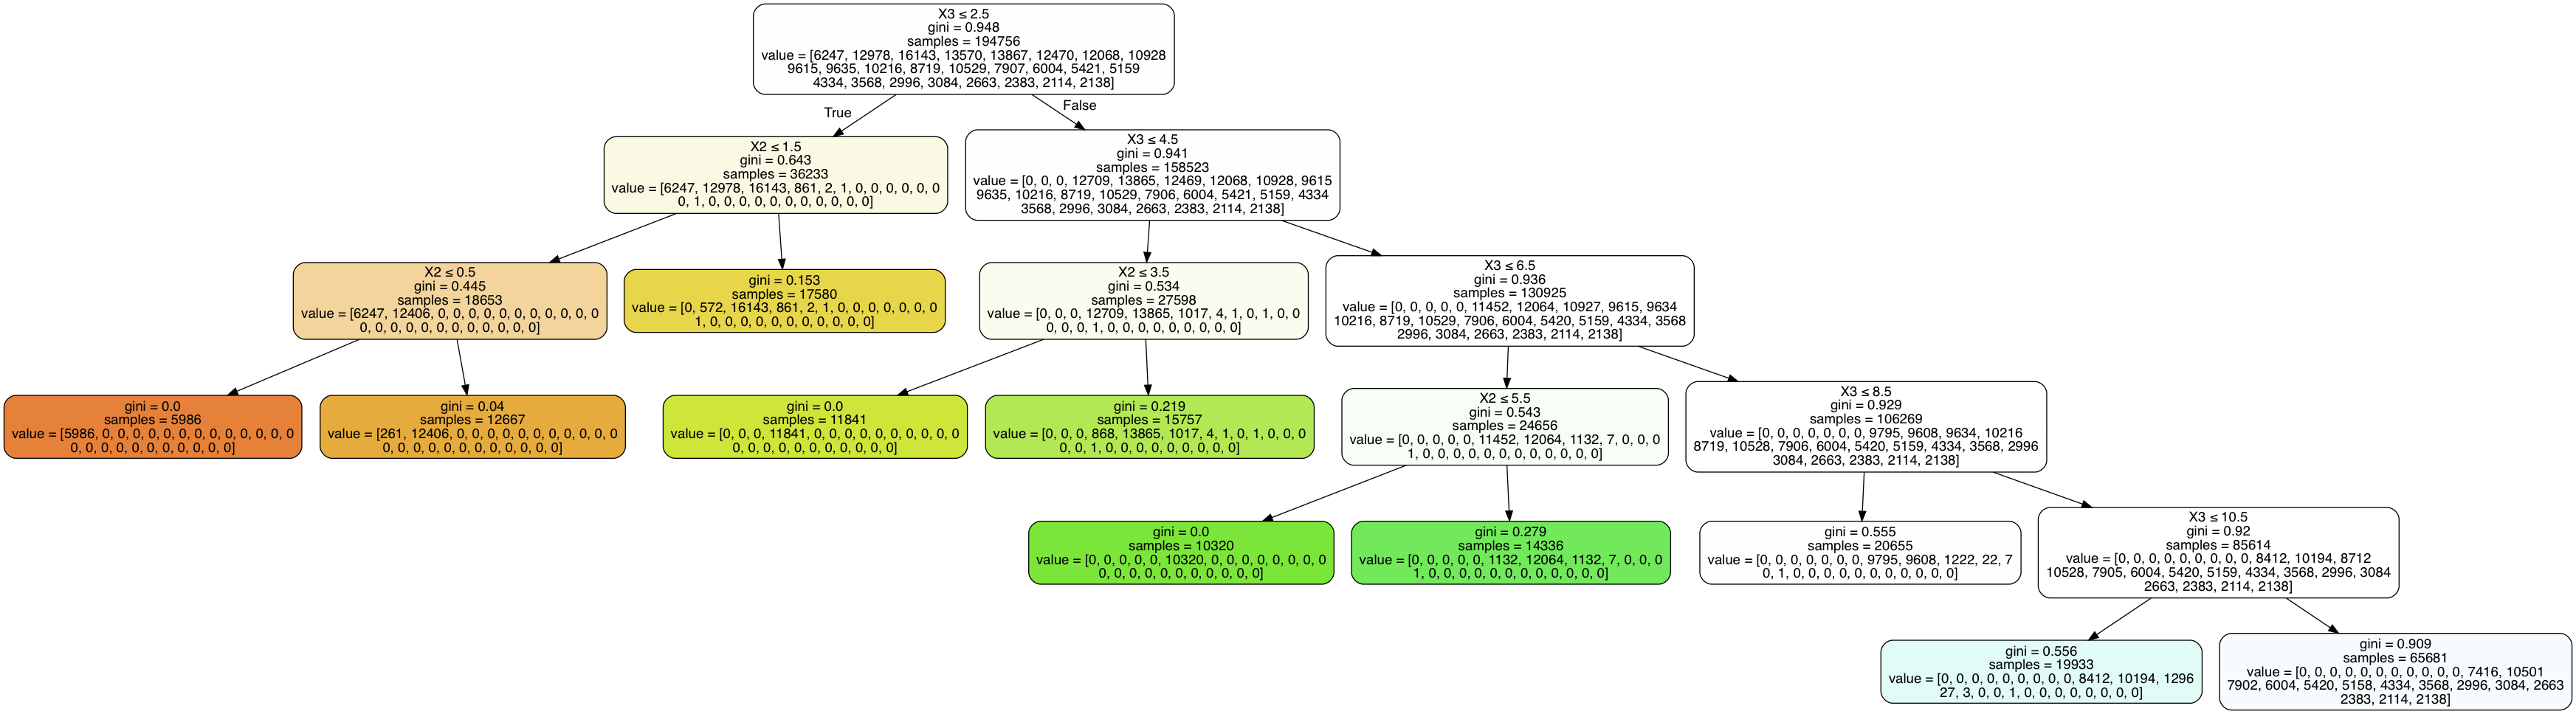

In [340]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Text(0.5,0,'Relative Importance')

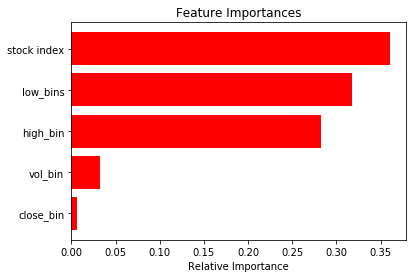

In [337]:
mp.figure(1)
mp.title('Feature Importances')
mp.barh(range(len(indices)), importances[indices], color='r', align='center')
mp.yticks(range(len(indices)), features)
mp.xlabel('Relative Importance')